In [2]:
# Dependencies and Setup:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook:
import warnings
warnings.filterwarnings('ignore')

# Name files to load:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the data:
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset:
mouse_drugs=pd.merge(mouse_data, clinical_data, on=["Mouse ID"])

# Display the data table for preview:
mouse_drugs.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_means=mouse_drugs.groupby(["Timepoint","Drug"]).mean()

#Drop unnecessary column:
tumor_volume_means=tumor_volume_means.drop(columns=["Metastatic Sites"])

#Format:
tumor_volume_means=tumor_volume_means.unstack()

# Preview:
tumor_volume_means.head()



Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint:
tumor_volume_errors=mouse_drugs.groupby(["Timepoint","Drug"]).sem()

#Drop unnecessary columns:
tumor_volume_errors=tumor_volume_errors.drop(columns=["Metastatic Sites", "Mouse ID"])

#Format:
tumor_volume_errors=tumor_volume_errors.unstack()

#Preview:
tumor_volume_errors


Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

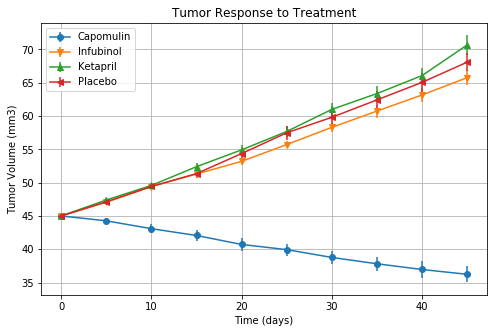

In [184]:
#Set figure size:
fig, ax = plt.subplots(figsize=(8,5))

#Write list of drugs to be analyzed:
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo"]

#Write list of markers:
markers=["o","v","^","<",">","8","s","p","P","*"]

#Write list of times:
times=[0,5,10,15,20,25,30,35,40,45]

#Iterate over list of drugs to write scatter plot with error bars (I'm sure there's an easier way to do this but it's too lateeee)
number=0
for drug in drugs:
    volume=tumor_volume_means["Tumor Volume (mm3)"][drug]
    errors=tumor_volume_errors["Tumor Volume (mm3)"][drug]
    ax.errorbar(x=times, y=volume, yerr=errors, marker=markers[number])
    number=number+1

#Set legends, axis labels, title, gridlines, and fontsize:
plt.legend(drugs)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.title("Tumor Response to Treatment")
plt.grid(True)
plt.rc('font', size=10)
plt.rc('figure', titlesize=30)

plt.savefig("Plots/Tumor_Response_Plot")


## Metastatic Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
metastatic_means=mouse_drugs.groupby(["Timepoint","Drug"]).mean()

#Drop unneccesary columns:
metastatic_means=metastatic_means.drop(columns=["Tumor Volume (mm3)"])

#Format:
metastatic_means=metastatic_means.unstack()

#Preview:
metastatic_means.head()


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
metastatic_errors=mouse_drugs.groupby(["Timepoint","Drug"]).sem()

#Drop unnecessary columns:
metastatic_errors=metastatic_errors.drop(columns=["Tumor Volume (mm3)", "Mouse ID"])

#Format:
metastatic_errors=metastatic_errors.unstack()

#Preview DataFrame:
metastatic_errors

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

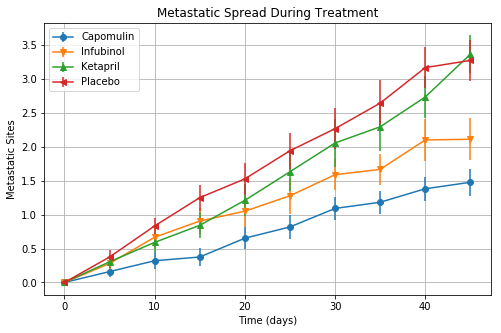

In [178]:
#Set figure size:
fig, ax = plt.subplots(figsize=(8,5))

#Iterate over list of drugs from above to write scatter plot with error bars:
number=0
for drug in drugs:
    metastatic_sites=metastatic_means["Metastatic Sites"][drug]
    errors=metastatic_errors["Metastatic Sites"][drug]
    ax.errorbar(x=times, y=metastatic_sites, yerr=errors, marker=markers[number])
    number=number+1

#Set legends, axis labels, title, gridlines, and fontsize:
plt.legend(drugs)
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (days)")
plt.title("Metastatic Spread During Treatment")
plt.grid(True)
plt.rc('font', size=10)
plt.rc('figure', titlesize=30)


## Survival Rates

In [16]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_counts=mouse_drugs.groupby(["Timepoint","Drug"]).count()

#Drop unnecessary columns:
mouse_counts=mouse_counts.drop(columns=["Metastatic Sites", "Tumor Volume (mm3)"])

#Format:
mouse_counts=mouse_counts.unstack()

#Preview:
mouse_counts.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

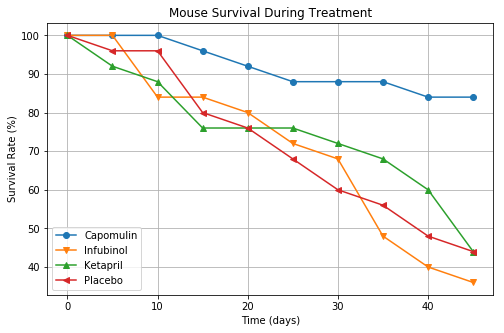

In [177]:
#Set Figure size:
fig, ax = plt.subplots(figsize=(8,5))

#Iterate over drug list from before
number=0
for drug in drugs:
    mouse_total=mouse_counts["Mouse ID"][drug][0]
    mouse_count=mouse_counts["Mouse ID"][drug]
    mouse_percent=mouse_count/mouse_total*100
    ax.errorbar(x=times, y=mouse_percent, marker=markers[number])
    number=number+1

#Set legends, axis labels, title, gridlines, and fontsize:
plt.legend(drugs)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (days)")
plt.title("Mouse Survival During Treatment")
plt.grid(True)
plt.rc('font', size=10)
plt.rc('figure', titlesize=30)


## Summary Bar Graph

In [171]:
# set tumor_percent o be empty dictionary:
tumor_percent=[]

#Iterate over drugs and fill dictionary with calculated percent changes
for drug in drugs:
    tumor_final=tumor_volume_means["Tumor Volume (mm3)"][drug][45]
    tumor_percent_change=((tumor_final-45)/45)*100
    tumor_percent.append(tumor_percent_change)
    
# put data into dataframe:
tumor_percent_df=pd.DataFrame(tumor_percent, drugs)

#write new column to indicate postive or negative value
tumor_percent_df['Positive'] = tumor_percent_df[0] > 0

#Rename second column:
tumor_percent_df=tumor_percent_df.rename(columns={0:'Percent'})

#print data frame:
tumor_percent_df

,Percent,Positive
Capomulin,-19.475303,False
Infubinol,46.123472,True
Ketapril,57.028795,True
Placebo,51.297960,True


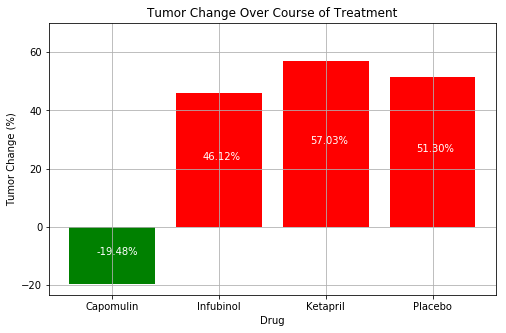

In [180]:
#set fig size:
fig, ax = plt.subplots(figsize=(8,5))

#Plot the bar graph:
plt.bar(drugs, tumor_percent_df["Percent"], color=tumor_percent_df.Positive.map({True: 'red', False: 'green'}))

#Set labels, gridlnes, title, axis labels, etc:
plt.ylabel("Tumor Change (%)")
plt.xlabel("Drug")
plt.title("Tumor Change Over Course of Treatment")
plt.ylim(top=70)
plt.grid(True)
plt.rc('font', size=10)
plt.rc('figure', titlesize=30)

#Put perent values on bars:
num=0
for drug in drugs:
    tumor_change=tumor_percent_df["Percent"][drug]
    height=tumor_change/2
    percent='{:.2f}%'.format(tumor_change)
    plt.text(num-0.15,height,percent, color="white")
    num=num+1

